In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/ECE285_Project/SP24UCSDECE285-associator

/content/drive/MyDrive/ECE285_Project/SP24UCSDECE285-associator


In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda'

# Environment Setup


In [ ]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-a_z8clru
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-a_z8clru
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_

In [ ]:
!pip install segment_anything

In [ ]:
!pip install Pillow

# Test for Environment

In [ ]:
pwd

'/content/drive/MyDrive/ECE285_Project/SP24UCSDECE285-associator'

## Clip Test

In [ ]:
!python clip_test.py

100%|███████████████████████████████████████| 338M/338M [00:08<00:00, 42.4MiB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
Label probs: [[0.5933 0.3328 0.0742]]


## SAM Test

In [ ]:
!python sam_test.py

# Main Code

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/ECE285_Project/SP24UCSDECE285-associator')

Please chose the dataset you want use. There are two datasets, we first collects all the information of these two dataset and store them in pkl file for easy reading next time.

In [ ]:
import matplotlib.pyplot as plt

from utils import *
from PIL import Image
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
import clip
import pickle
from associator import *

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
clip_model, preprocess = clip.load("ViT-B/32", device=device)

img_path = 'imgs/mytable_b.pkl'

In [ ]:
img_path = 'imgs/mytable_b.pkl'

This part is to save images' information. You should only run once. Next time, you could run next cell directly.

In [ ]:
## Run Only Once
associator = Associator(sam, clip_model, preprocess)

# imgs = read_images_from_directory('mytable/a') + read_images_from_directory('mytable/b')
imgs = read_images_from_directory('mytable/b')
for img in imgs:
    associator.add_img(img)

# save the associator object's images
associator.save_img(img_path)

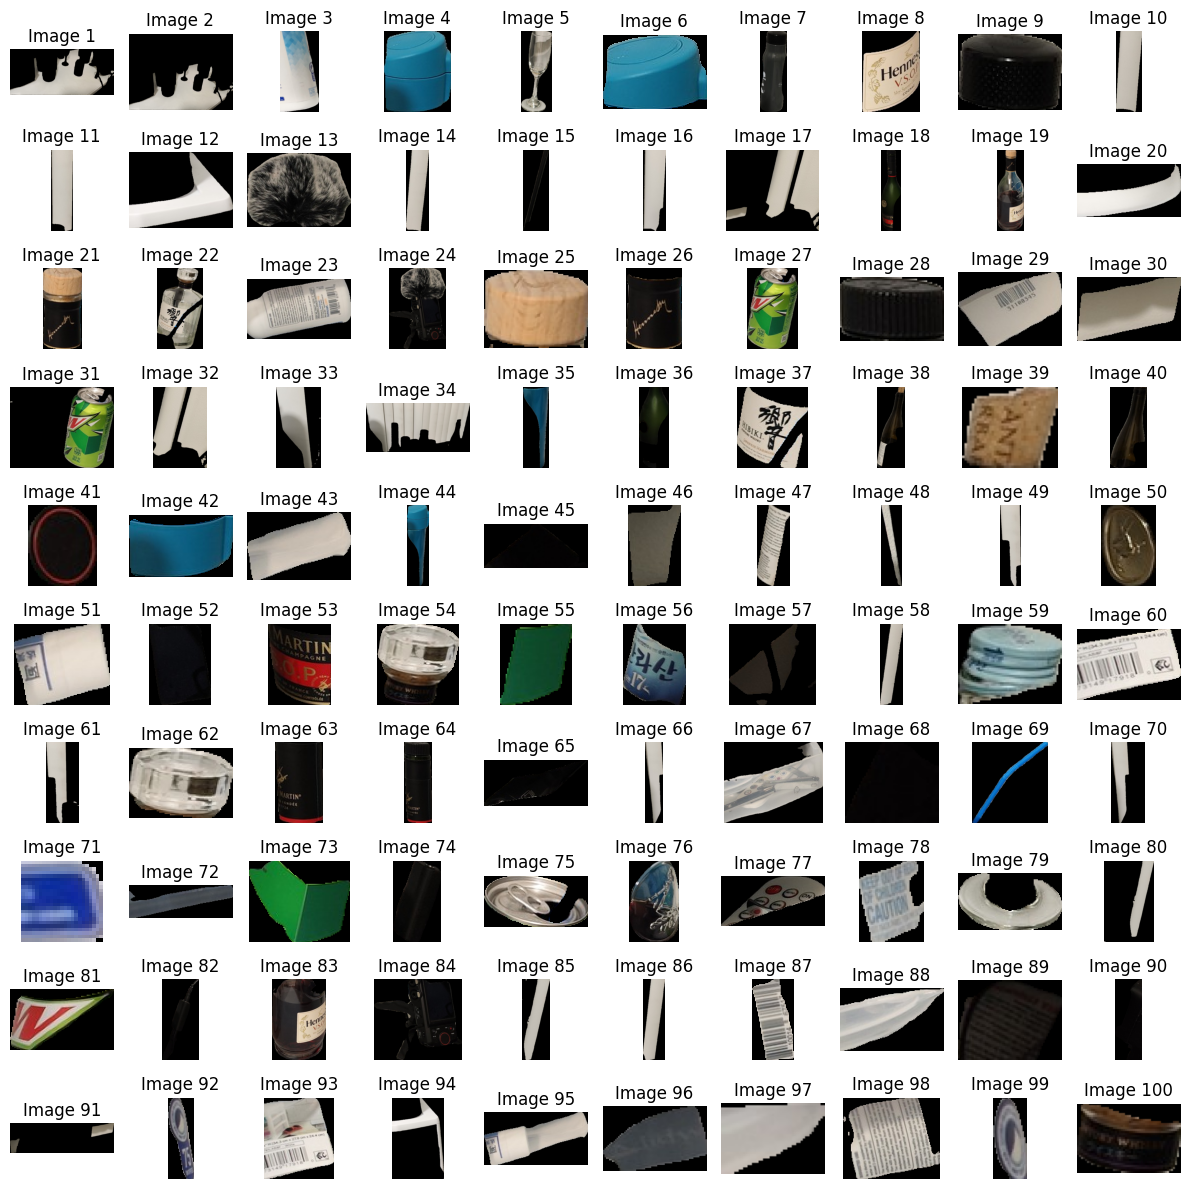

In [ ]:
associator = Associator(sam, clip_model, preprocess, img_path)

# Visualize some of the segments of the first image. Choose one as the target.
cutouts = []
for i in range(100):
    cutout = associator.cutout_region(associator.imgs[0]['img'], associator.imgs[0]['segments'][i]['mask'])
    cutouts.append(cutout)
show_images_grid(cutouts)

Here you should select the segment as the target reference picture. Our model will automatically localize which item contains chosen segmentation. Then you can see that item extract from other images.

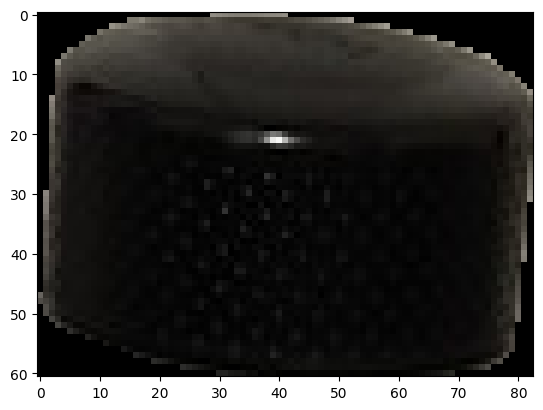

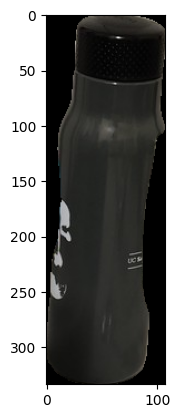

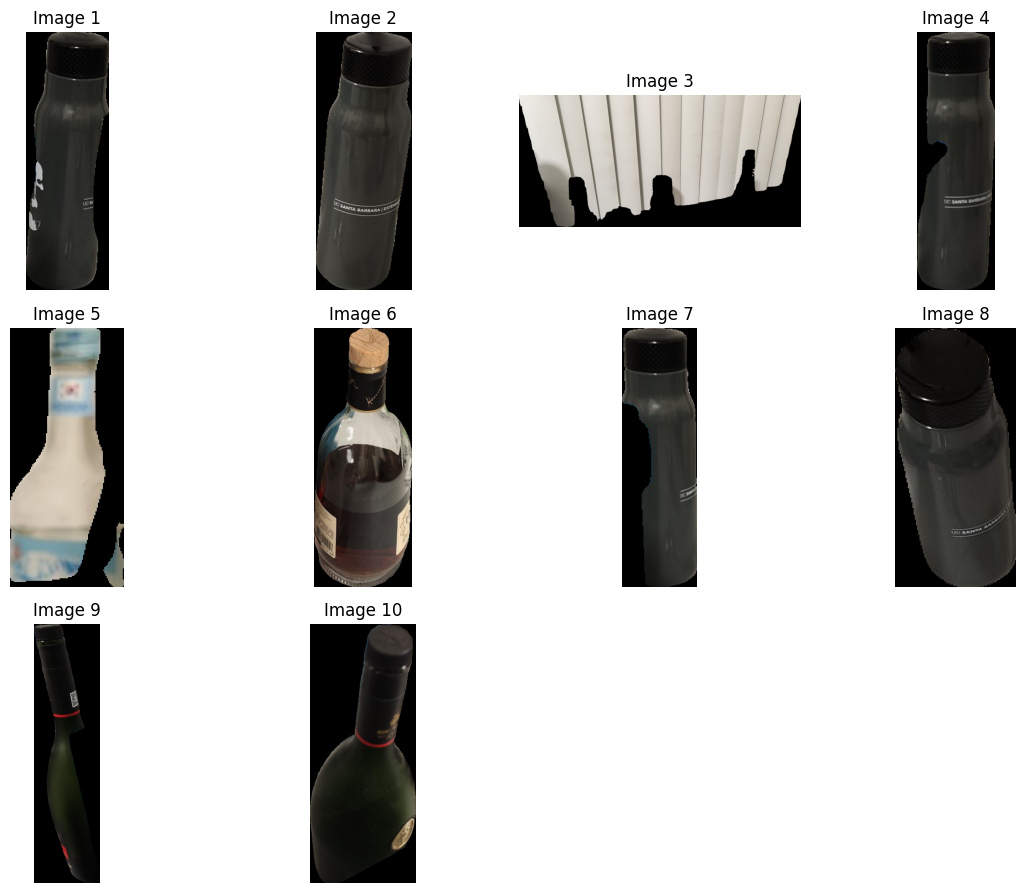

In [ ]:
# Table-a Experiments: 47, 41, 3, 28, 17, 2, 31, (21, 67)
# Table-b Experiments: 4, 26, 7, 5, 12, 21, 17, 6
idx = 8   # chose segmentation
target = associator.cutout_region(associator.imgs[0]['img'], associator.imgs[0]['segments'][idx]['mask'])
max_target = associator.find_MaxTarget(associator.imgs[0], associator.imgs[0]['segments'][idx]['mask'])  # find the maximum target in the specific image, avoid duplicate testing.

# show the target
plt.imshow(target)
plt.show()

plt.imshow(max_target)
plt.show()

# find associated objects
associated_cutouts = associator.query(max_target)

# Visualize results
show_images_grid(associated_cutouts)

## Test for Mask

In [ ]:
from importlib import reload
import associator
reload(associator)
from associator import *

associator = Associator(sam, clip_model, preprocess, img_path)

In [ ]:
associator.test(target)

2

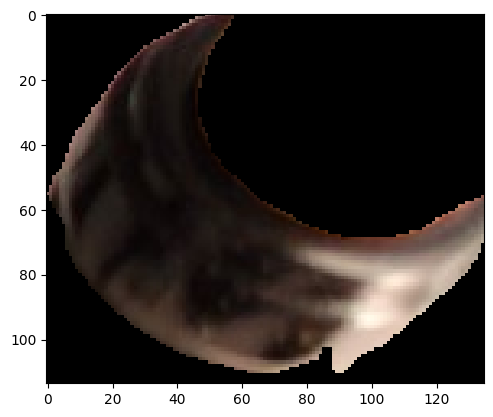

In [ ]:
max_cutout = associator.test(target)
plt.imshow(max_cutout)
plt.show()